In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = pd.read_csv('titanic.csv')

In [5]:
# Display column information to understand data types, non-null counts, and descriptions
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Display summary statistics for numerical columns to understand basic distributional properties
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Display the first few rows of the dataset for a general overview
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# Identify and display unique values for categorical columns (Pclass, Sex, and Embarked)
unique_values = {column: data[column].unique() for column in ['Pclass', 'Sex', 'Embarked']}
unique_values

{'Pclass': array([3, 1, 2], dtype=int64),
 'Sex': array(['male', 'female'], dtype=object),
 'Embarked': array(['S', 'C', 'Q', nan], dtype=object)}

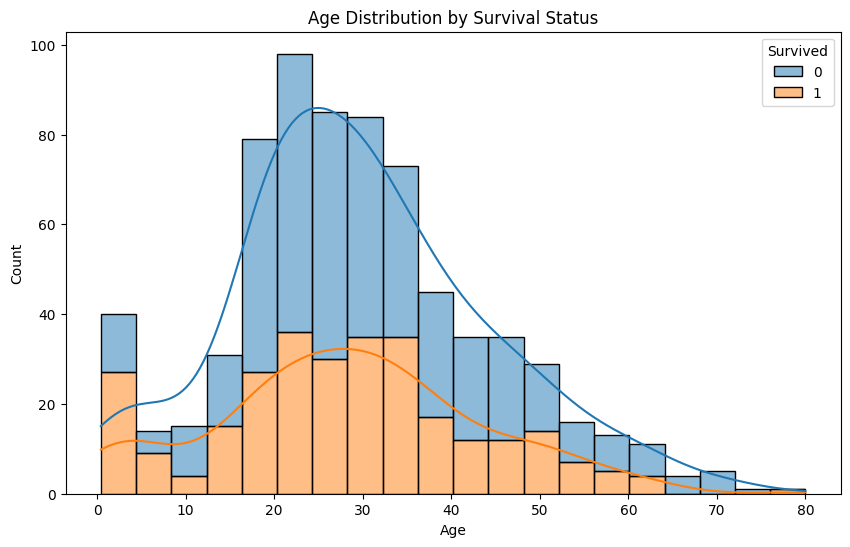

In [12]:
# Age distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="Age", hue="Survived", multiple="stack", kde=True)
plt.title("Age Distribution by Survival Status")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

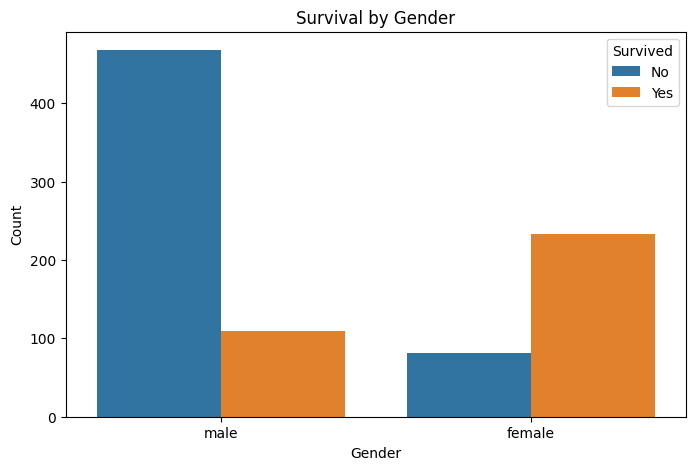

In [13]:
# Survival by gender plot
plt.figure(figsize=(8, 5))
sns.countplot(x="Sex", hue="Survived", data=data)
plt.title("Survival by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

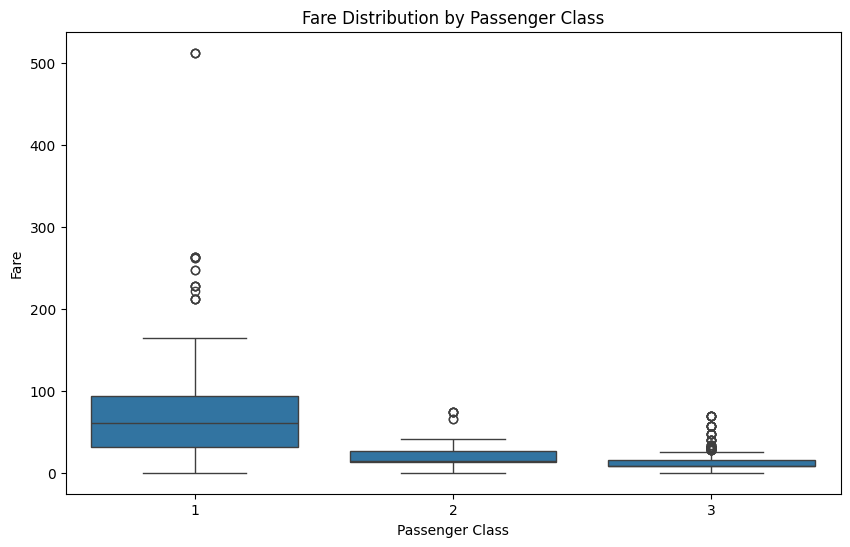

In [14]:
# Fare distribution by class
plt.figure(figsize=(10, 6))
sns.boxplot(x="Pclass", y="Fare", data=data)
plt.title("Fare Distribution by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Fare")
plt.show()

In [15]:
# 1. Data Preprocessing
# Handling missing values
data['Age'].fillna(data['Age'].median(), inplace=True)  # Fill age with median
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)  # Fill embarked with mode
data.drop(columns=['Cabin', 'Ticket', 'Name'], inplace=True)  # Drop columns with too many missing or irrelevant info

# Encoding categorical variables
data['Sex'] = LabelEncoder().fit_transform(data['Sex'])
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

# Define features and target variable
X = data.drop(columns=['Survived', 'PassengerId'])
y = data['Survived']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\Ravindu\AppData\Local\Temp\ipykernel_6920\1451869908.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)  # Fill age with median
C:\Users\Ravindu\AppData\Local\Temp\ipykernel_6920\1451869908.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

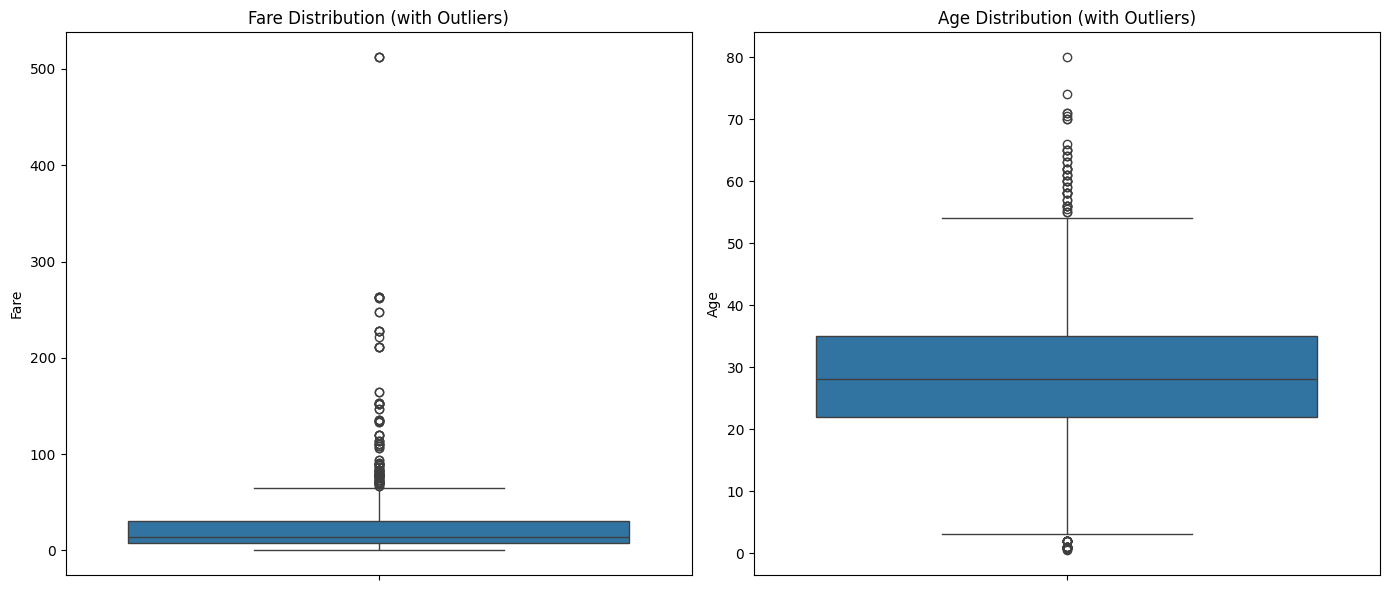

In [16]:
# Set the plot size for better visibility
plt.figure(figsize=(14, 6))

# Fare Box Plot
plt.subplot(1, 2, 1)
sns.boxplot(data=data, y='Fare')
plt.title("Fare Distribution (with Outliers)")
plt.ylabel("Fare")

# Age Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(data=data, y='Age')
plt.title("Age Distribution (with Outliers)")
plt.ylabel("Age")

# Show the plots
plt.tight_layout()
plt.show()

In [4]:
# 2. Model Training and Evaluation
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    return accuracy, precision, recall, f1, auc

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    results[model_name] = evaluate_model(model, X_test, y_test)

In [5]:
# Display results
results_df = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'])
print("Model Performance Comparison:")
print(results_df)

Model Performance Comparison:
           Logistic Regression  Random Forest
Accuracy              0.810056       0.810056
Precision             0.785714       0.785714
Recall                0.743243       0.743243
F1 Score              0.763889       0.763889
AUC                   0.881982       0.887838


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



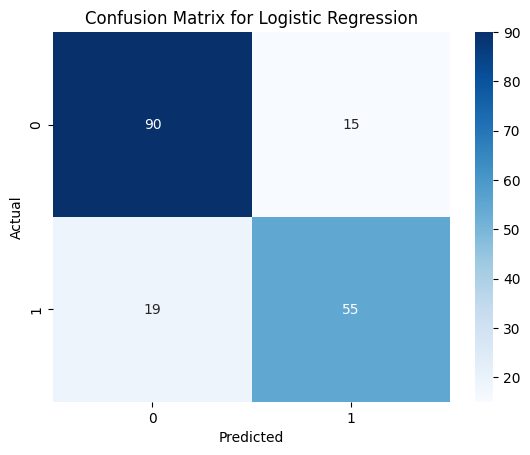

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



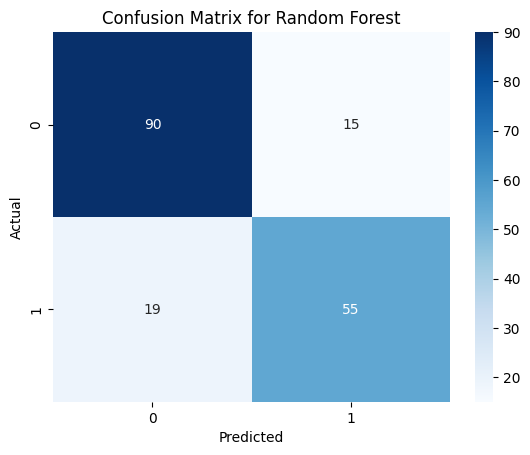

In [6]:
# 3. Detailed Model Evaluation
for model_name, model in models.items():
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, model.predict(X_test)))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, model.predict(X_test))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

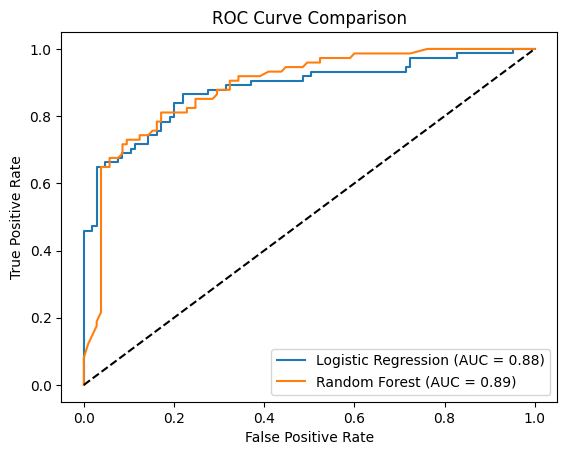

In [8]:
# ROC Curve Comparison
from sklearn.metrics import roc_curve, auc

plt.figure()
for model_name, model in models.items():
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='best')
plt.show()

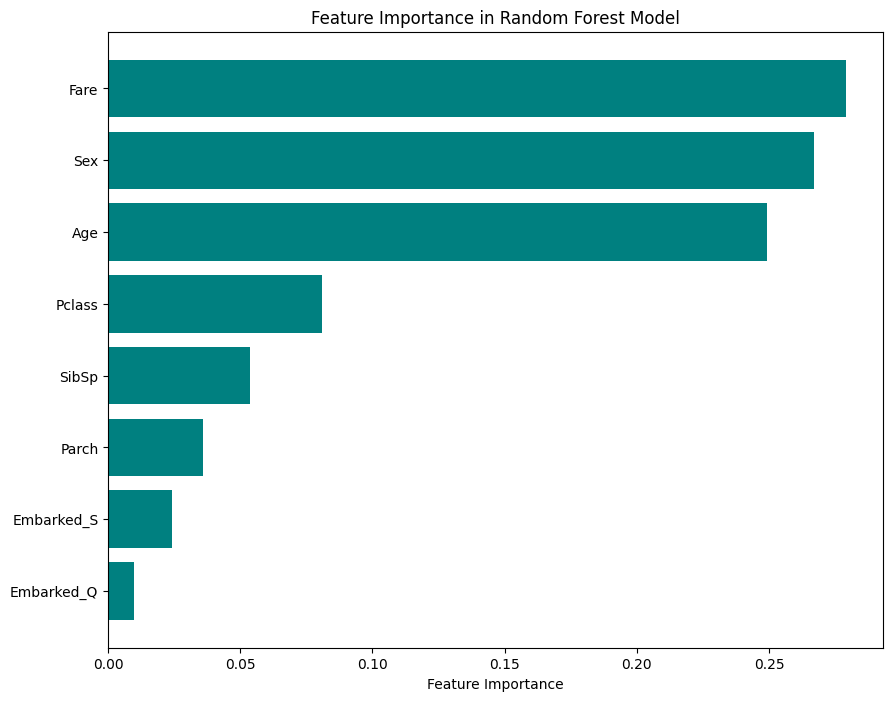

In [13]:
# 2. Feature Importance from Random Forest
rf_model = models["Random Forest"]
feature_importance = rf_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(10, 8))
plt.barh(X.columns[sorted_idx], feature_importance[sorted_idx], color="teal")
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Random Forest Model")
plt.show()

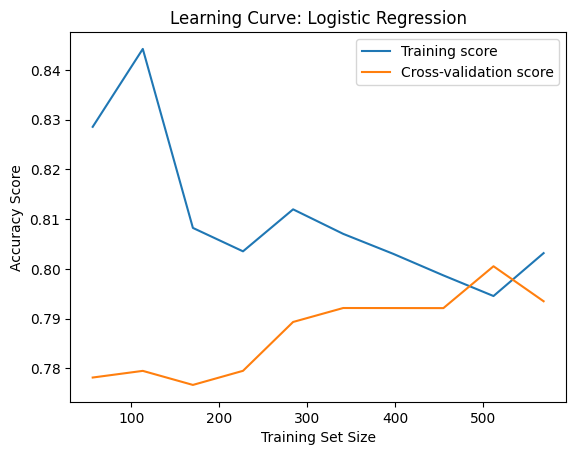

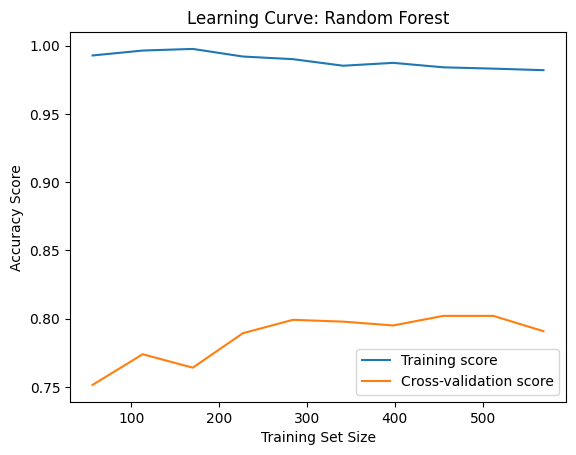

In [16]:
# 3. Learning Curves
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='accuracy', n_jobs=-1,
                                                            train_sizes=np.linspace(0.1, 1.0, 10))
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure()
    plt.plot(train_sizes, train_scores_mean, label="Training score")
    plt.plot(train_sizes, test_scores_mean, label="Cross-validation score")
    plt.title(f"Learning Curve: {title}")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy Score")
    plt.legend(loc="best")
    plt.show()

plot_learning_curve(LogisticRegression(random_state=42), X_train, y_train, "Logistic Regression")
plot_learning_curve(RandomForestClassifier(random_state=42), X_train, y_train, "Random Forest")

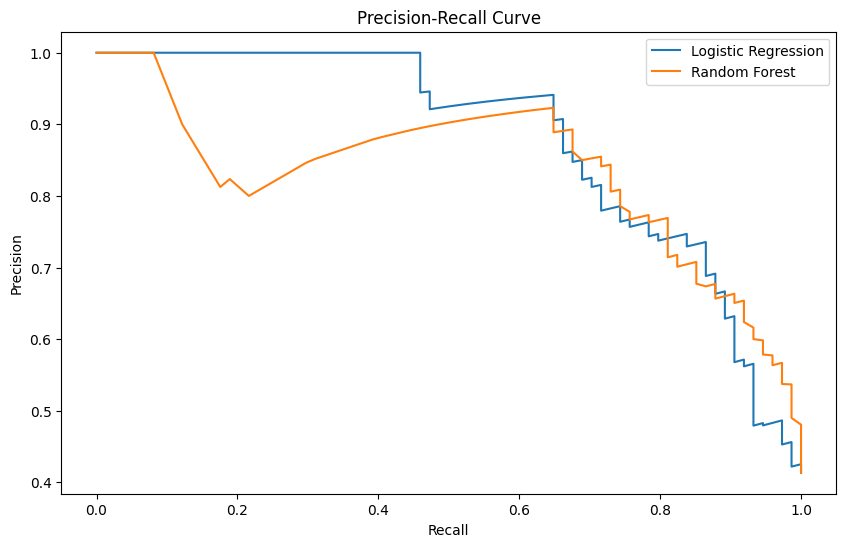

In [17]:
# 4. Precision-Recall Curve
from sklearn.metrics import precision_recall_curve

plt.figure(figsize=(10, 6))
for model_name, model in models.items():
    y_scores = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    plt.plot(recall, precision, label=f'{model_name}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc='best')
plt.show()

In [9]:
# Summary
print("Summary of Model Comparison:")
print(results_df)

Summary of Model Comparison:
           Logistic Regression  Random Forest
Accuracy              0.810056       0.810056
Precision             0.785714       0.785714
Recall                0.743243       0.743243
F1 Score              0.763889       0.763889
AUC                   0.881982       0.887838
